# Basline Model 

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import missingno as msno
import seaborn as sns
import matplotlib as plt

import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('data/Train.csv')
df_Test = pd.read_csv('data/Train.csv')

### Correlation of Features

In [4]:
# Function to get number density columns 
# the tropospheric_X_column_number_density measures density closer to Earth’s surface
def get_number_density_columns(df):
    return [
        col for col in df.columns 
        if "column_number_density" in col and "tropospheric" in col
    ]

In [5]:
cols = get_number_density_columns(df)
print(cols)


['L3_NO2_tropospheric_NO2_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf']


In [6]:
selected_cols = ["Place_ID", "target", "temperature_2m_above_ground", "u_component_of_wind_10m_above_ground",'L3_NO2_tropospheric_NO2_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf']
df_selected = df[selected_cols]  

In [7]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID                                             30557 non-null  object 
 1   target                                               30557 non-null  float64
 2   temperature_2m_above_ground                          30557 non-null  float64
 3   u_component_of_wind_10m_above_ground                 30557 non-null  float64
 4   L3_NO2_tropospheric_NO2_column_number_density        21888 non-null  float64
 5   L3_HCHO_tropospheric_HCHO_column_number_density      23132 non-null  float64
 6   L3_HCHO_tropospheric_HCHO_column_number_density_amf  23132 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.6+ MB


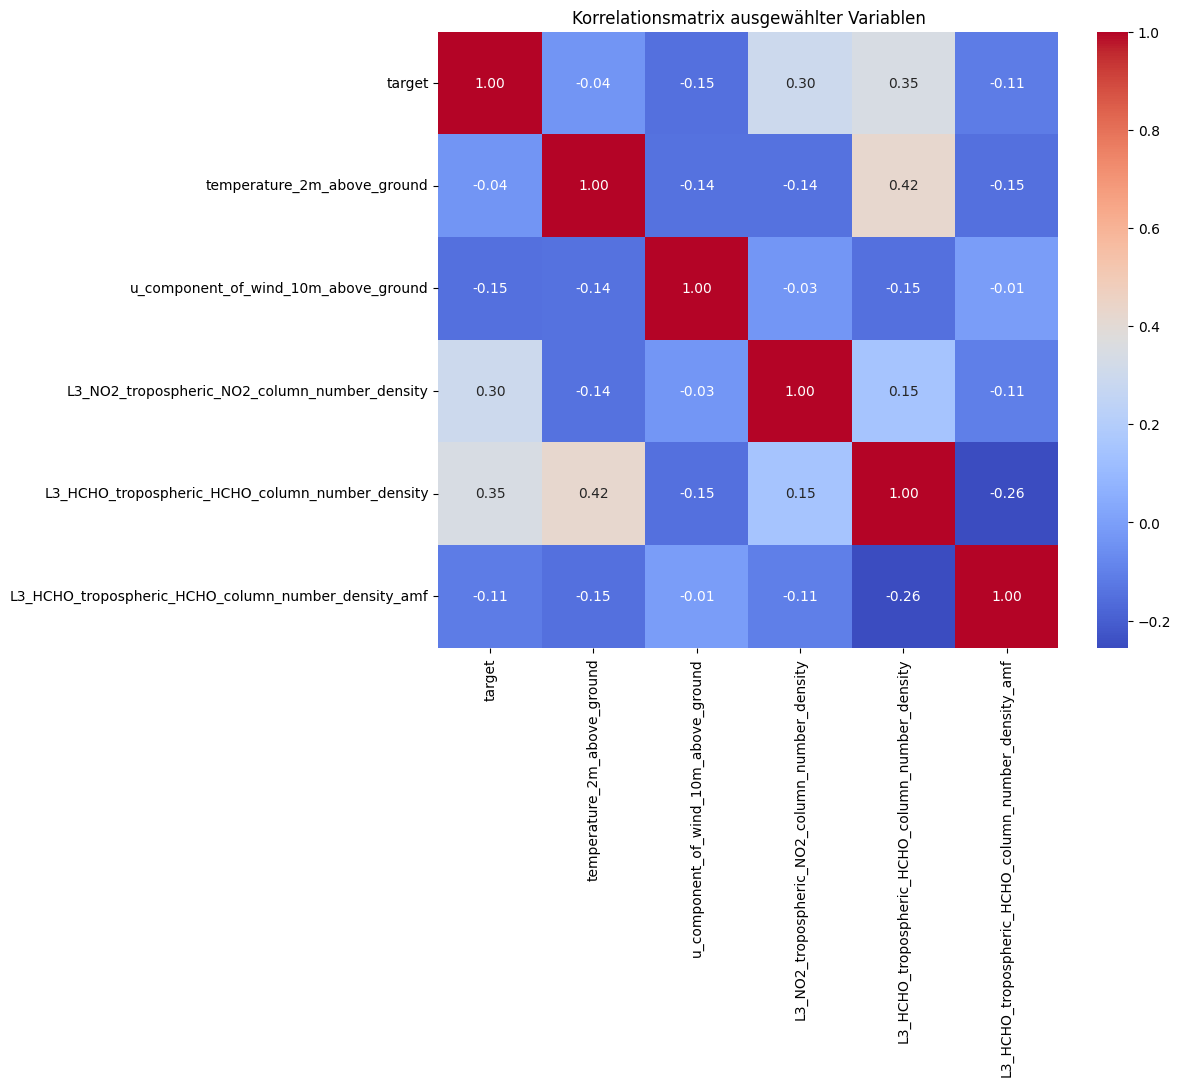

In [8]:
# Plot correlation matrix   
corr = df_selected.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix ausgewählter Variablen")
plt.show()

### Features and Train/ Test-Split

In [16]:
features = [
    #'temperature_2m_above_ground',
    #'u_component_of_wind_10m_above_ground',
    'L3_NO2_tropospheric_NO2_column_number_density',
    'L3_HCHO_tropospheric_HCHO_column_number_density'
]
X = df[features]
y = df['target']

In [10]:
X.isnull().sum() * 100 / len(X)

L3_NO2_tropospheric_NO2_column_number_density      28.369932
L3_HCHO_tropospheric_HCHO_column_number_density    24.298851
dtype: float64

In [17]:
# fill missing values with mean
X = X.fillna(X.mean())

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (24445, 2)
Test set size: (6112, 2)


### Modeling

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 31.543023617501365
R^2 Score: 0.138406679586086


In [15]:
# The baseline linear regression model explains around 13% of the variance in the target variable.